In [2]:
import MDAnalysis as mda
from MDAnalysis.transformations import unwrap
import numpy as np
import copy

/home/simon/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import matplotlib.pyplot as plt

NameError: name 'stop' is not defined

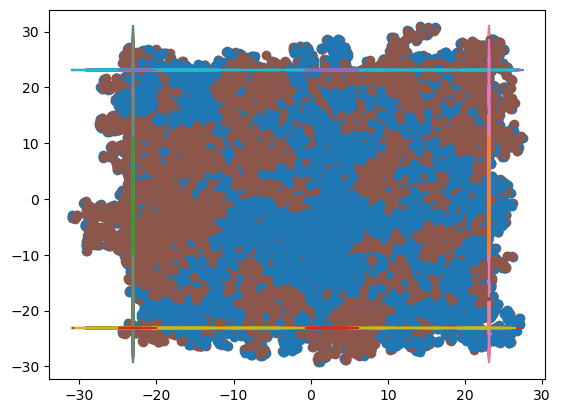

In [55]:
# Keep molecule full
u = mda.Universe("created.data", "dump.xtc")
u.transfer_to_memory()
all_direction_shift = np.zeros((u.residues.n_residues, 3)) # to ensure the shift of a residue is always in the same direction --> prevent unatural jumps
for ts in u.trajectory:
    dims = ts.dimensions[:3]
    for res, ires in zip(u.residues, np.arange(u.residues.n_residues)):
        com = res.atoms.center_of_mass()
        positions = res.atoms.positions

        #plt.plot(positions[:,0], positions[:,1], "s")

        boundary_issue = np.abs(res.atoms.positions - com) > dims/2
        for issue_x, com_x, dim_x, i, pos_x in zip(boundary_issue.T, com, dims, [0, 1, 2], positions.T):
            direction_shift = all_direction_shift[ires, i]
            if np.sum(issue_x)>0:
                if direction_shift == 0.0:
                    if com_x < 0:
                        direction_shift = -1.0
                        all_direction_shift[ires, i] = direction_shift
                    else:
                        direction_shift = 1.0
                        all_direction_shift[ires, i] = direction_shift
                if direction_shift < 0:
                    positions[issue_x, i] -= dim_x
                elif direction_shift > 0:
                    positions[issue_x, i] += dim_x
                else:
                    print("There is a problem")
        res.atoms.positions = positions 

        boundary_issue = np.abs(res.atoms.positions - com) > dims/2
        if np.sum(boundary_issue) > 0:
            stop

        plt.plot(positions[:,0], positions[:,1], "o")
        plt.plot(positions[:,0]*0+dims[0]/2, positions[:,1], "-")
        plt.plot(positions[:,0]*0-dims[0]/2, positions[:,1], "-")
        plt.plot(positions[:,0], positions[:,1]*0-dims[1]/2, "-")
        plt.plot(positions[:,0], positions[:,1]*0+dims[1]/2, "-")



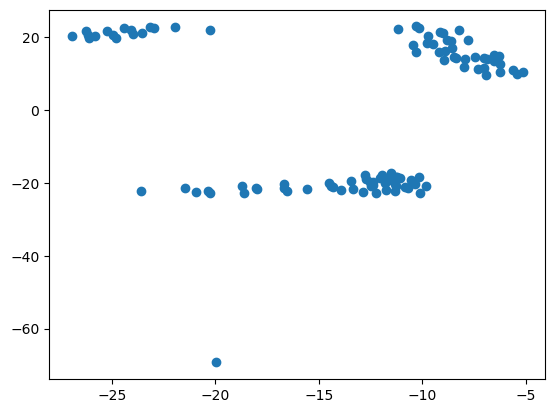

In [59]:
plt.plot(res.atoms.positions[:,0], res.atoms.positions[:,1], 'o')

In [3]:

 
        com = res.atoms.center_of_mass()
        assert np.sum(com < 1.5*dims/2) == 3 # if not, very far
        assert np.sum(com > -1.5*dims/2) == 3 # if not, very far
with mda.Writer("mol1.xtc", u.atoms.n_atoms) as W:
    for ts_temp in u.trajectory:
        W.write(u)

In [36]:
com

array([ -6.47042862, -23.10535648,  -9.0546196 ])

In [38]:
dims/2

array([23.099136, 23.099136, 23.099136], dtype=float32)

In [28]:
com < dims<2

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
# Assert continuity
u = mda.Universe("created.data", "mol1.xtc")
u.transfer_to_memory()
for ts in u.trajectory:
    dims = ts.dimensions[:3]
    all_com = []
    for res, ires in zip(u.residues, np.arange(u.residues.n_residues)):
        com = res.atoms.center_of_mass()
        positions = res.atoms.positions
        if ts.frame > 0:
            prev_com = all_prev_com[ires]
            diffs = prev_com - com
            anomalies = np.abs(diffs)>dims/2 # detect jump
            for anomalie, dim, i, diff in zip(anomalies, dims, [0, 1, 2], diffs):
                if anomalie:
                    if diff<0:
                        positions[:, i] -= dim
                        print(com)
                        stop
                    else:
                        positions[:, i] += dim
                        print(com)
                        stop
        res.atoms.positions = positions
        com = res.atoms.center_of_mass()
        
        all_com.append(com)
        if ts.frame > 0:
            diffs = prev_com - com    
            if np.sum(np.abs(diffs)>dims/2) > 0:
                print("warning:still a pb")
    all_prev_com = copy.deepcopy(all_com)
with mda.Writer("mol.xtc", u.atoms.n_atoms) as W:
    for ts_temp in u.trajectory:
        W.write(u)  

[-12.55746498 -13.51992929   0.50236931]


NameError: name 'stop' is not defined

In [22]:
res.atoms.positions = positions
com = res.atoms.center_of_mass()
com

array([ 33.63848839, -13.51992929,   0.50236931])

In [21]:
prev_com

array([ 23.09363221, -13.63545216,   0.61460741])

In [15]:
com

array([ 33.63848839, -13.51992929,   0.50236931])

In [7]:
com

array([-12.55746498, -13.51992929,   0.50236931])